In [25]:
%load_ext autoreload
%autoreload 2

GPU is not available, using CPU instead.
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from parsers import load_parallel_texts

# Load the dataset
dataset = load_parallel_texts('datasets/tatoeba/Tatoeba.en-ru.ru', 'datasets/tatoeba/Tatoeba.en-ru.en')

RU: Собака на заднем дворе.
EN: The dog is in the backyard.

RU: Увы, танцор из меня не очень.
EN: Unfortunately, I'm not much of a dancer.

RU: Том лёг на спину.
EN: Tom lay down on his back.

RU: Я безразличен.
EN: I'm neutral.

RU: Давайте это сделаем.
EN: Let's do this.

RU: Давно Ричард женат?
EN: Since when is Richard married?

Length: 540675
Russian Mean: 5.39, SD: 2.67
English Mean: 6.25, SD: 3.01
Unique Russian words: 149408
Unique English words: 62104


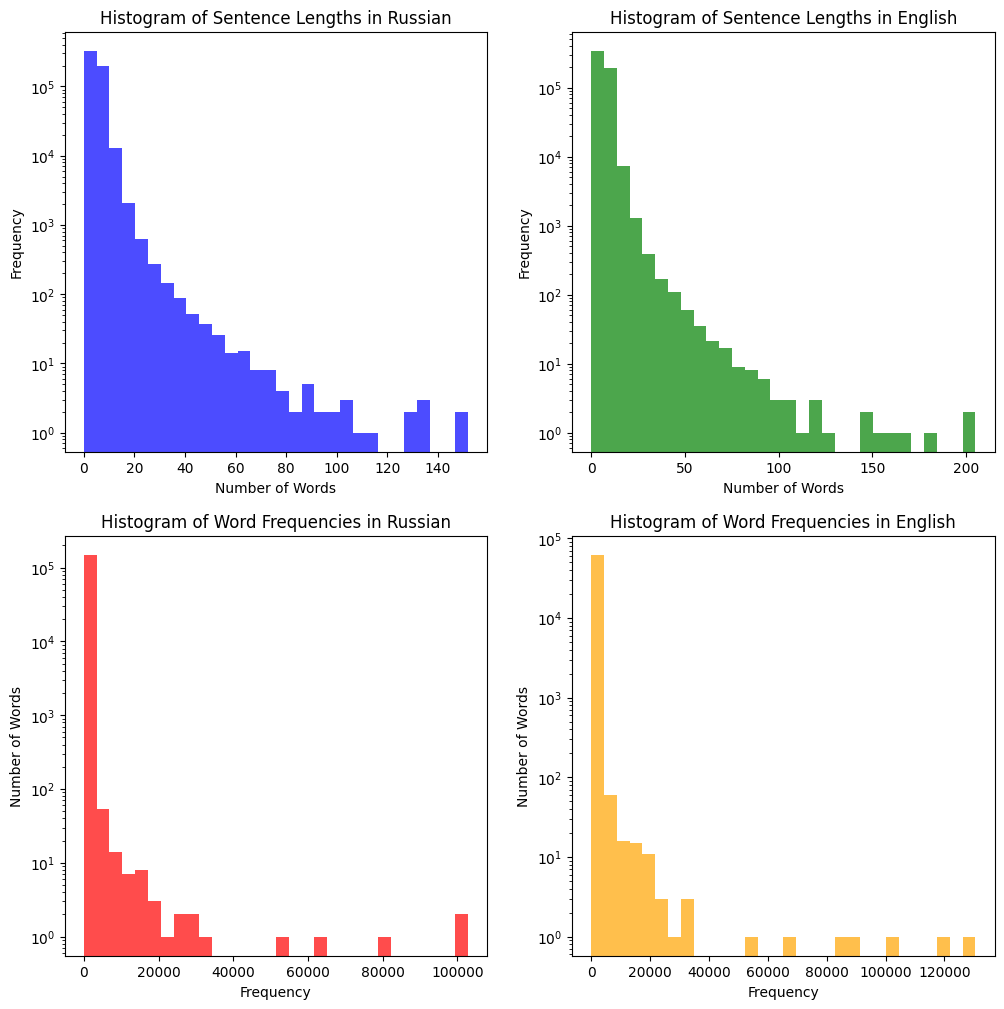

In [4]:
from data_analyze import show_random, stat

show_random(dataset, 6)
stat(dataset, log=True)

RU: вы не дать ей шанс .
EN: you do not give she a chance .

RU: я не думать , что мой жизнь скучный .
EN: I do not think my life be boring .

RU: показать мне лицо твоё , дать мне услышать голос твой ; потому что голос твой сладок и лицо твоё приятный .
EN: shew I thy face , let thy voice sound in my ear : for thy voice be sweet , and thy face comely .

RU: в жизнь его не забыть .
EN: I will never forget he as long as I live .

RU: том ничто не мочь сделать .
EN: Tom could do nothing .

RU: ответ положительный .
EN: the response be affirmative .

Length: 540675
Russian Mean: 6.84, SD: 3.33
English Mean: 7.73, SD: 3.47
Unique Russian words: 42403
Unique English words: 23532


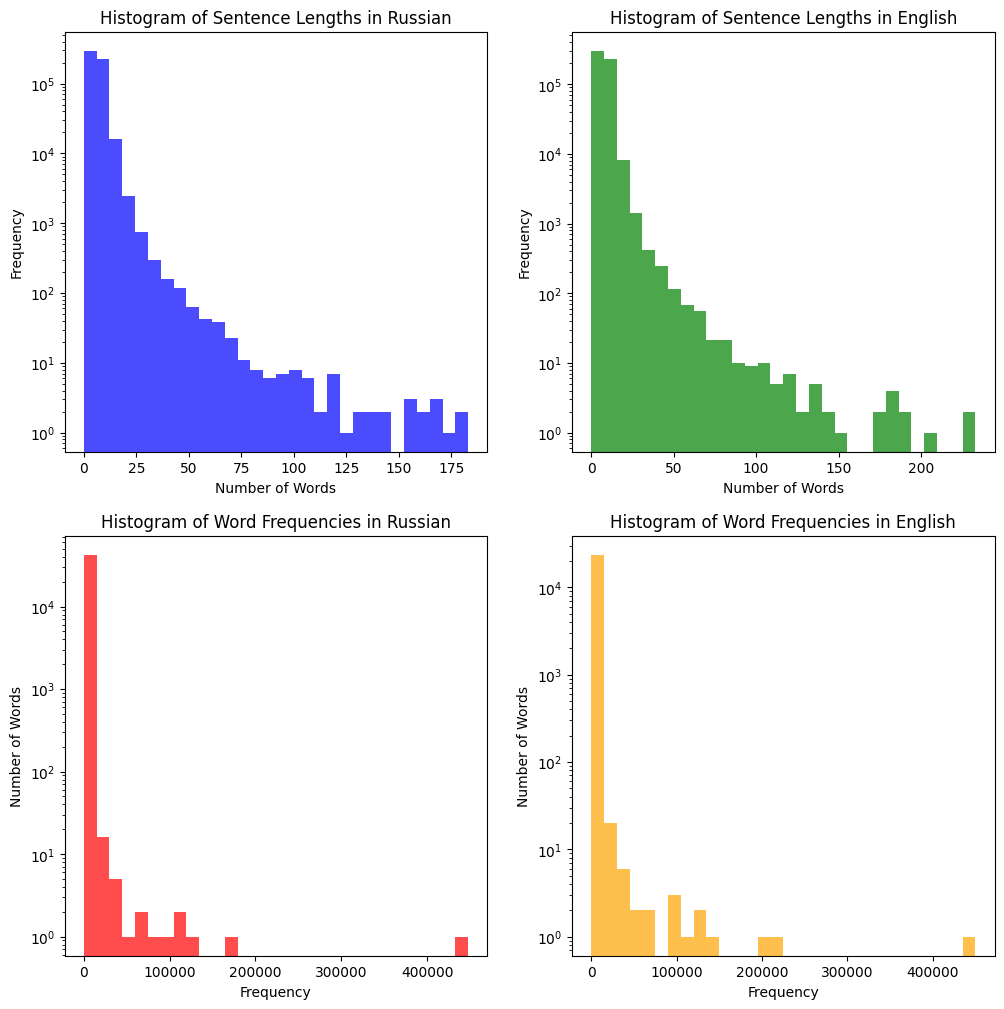

In [26]:
from parsers import load_one_file_texts

limit_dataset = load_one_file_texts("datasets/custom/limit_data.txt")

show_random(limit_dataset, 6)
stat(limit_dataset, log=True)

In [27]:
from data_analyze import compare_datasets

compare_datasets([dataset, limit_dataset], 6)

dataset 0: ('Наказание должно быть пропорционально преступлению.', 'The punishment should be proportionate to the crime.')
dataset 1: ('наказание должный быть пропорционально преступление .', 'the punishment should be proportionate to the crime .')

dataset 0: ('Я, блядь, не знаю, как переводить это предложение – переводи его сам, пусть каждый со своей хернёй разбирается.', "I fucking don't know how to translate this sentence, translate it yourself, everybody deal with their own shit.")
dataset 1: ('я , блядь , не знать , как переводить это предложение – переводить его сам , пусть каждый со свой хернёй разбираться .', 'I fucking do not know how to translate this sentence , translate it yourself , everybody deal with their own shit .')

dataset 0: ('Я попросил Тома поторопиться.', 'I asked Tom to hurry.')
dataset 1: ('я попросить том поторопиться .', 'I ask Tom to hurry .')

dataset 0: ('Том накричал на официанта.', 'Tom yelled at the waiter.')
dataset 1: ('том накричать на официант .',

RU: обе какое - то время молчали .
EN: they were both silent for a while .

RU: том сказал , что поможет нам .
EN: tom said he 'll help us .

RU: том сбежал по лестнице и обнял мэри .
EN: tom ran down the stairs and hugged mary .

RU: как я могу вам доверять ?
EN: how can i trust you ?

RU: помой руки !
EN: wash your hands !

RU: работайте дальше !
EN: keep working .

Length: 540675
Russian Mean: 6.84, SD: 3.33
English Mean: 7.73, SD: 3.47
Unique Russian words: 83451
Unique English words: 28261


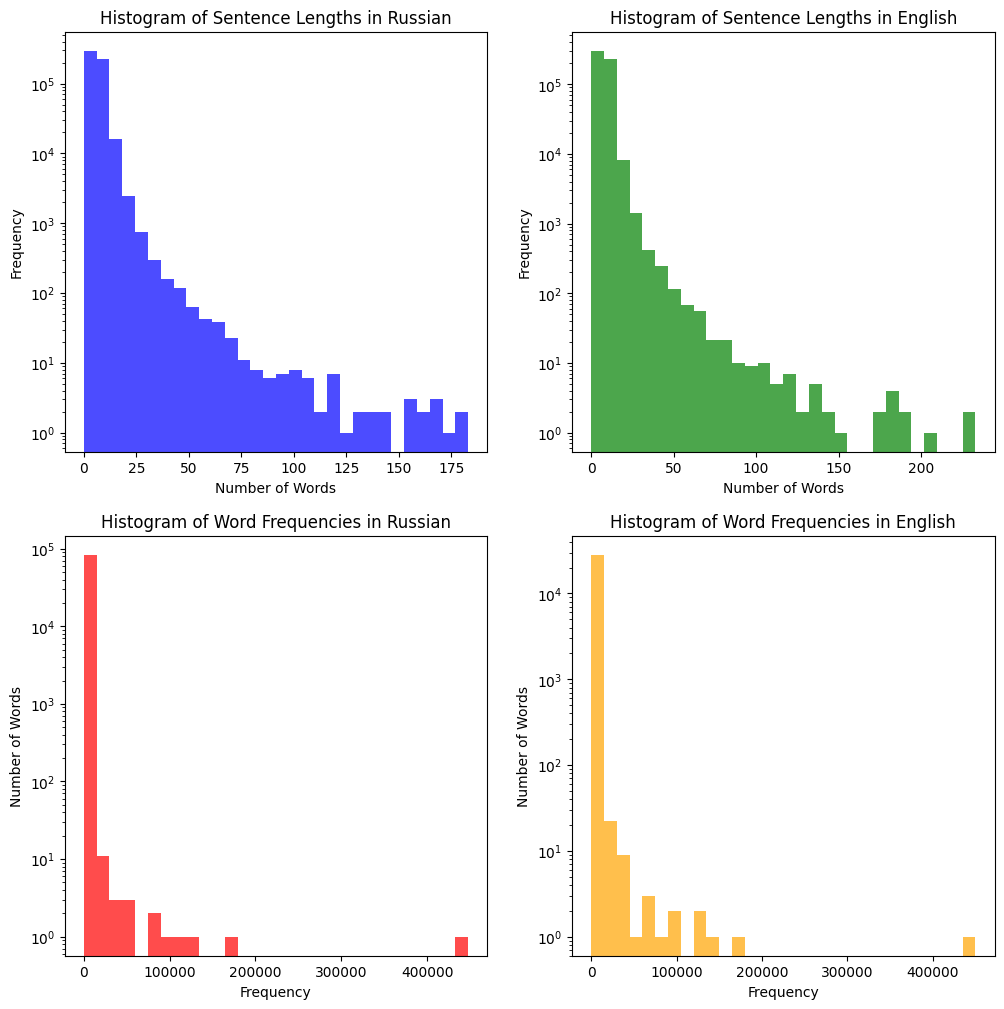

In [28]:

norm_dataset = load_one_file_texts("datasets/custom/norm_data.txt")

show_random(norm_dataset, 6)
stat(norm_dataset, log=True)


In [29]:
compare_datasets((dataset, norm_dataset, limit_dataset), 5)

dataset 0: ('Он её простил.', 'He forgave her.')
dataset 1: ('он её простил .', 'he forgave her .')
dataset 2: ('он её простить .', 'he forgive she .')

dataset 0: ('Я хочу, чтобы она была у тебя.', 'I want you to have it.')
dataset 1: ('я хочу , чтобы она была у тебя .', 'i want you to have it .')
dataset 2: ('я хотеть , чтобы она быть у тебя .', 'I want you to have it .')

dataset 0: ('Похоже, вам удалось решить проблему самостоятельно.', 'It looks like you managed to solve the problem on your own.')
dataset 1: ('похоже , вам удалось решить проблему самостоятельно .', 'it looks like you managed to solve the problem on your own .')
dataset 2: ('Похоже , вам удаться решить проблема самостоятельно .', 'it look like you manage to solve the problem on your own .')

dataset 0: ('Я знаю, что здесь происходит.', "I know what's going on here.")
dataset 1: ('я знаю , что здесь происходит .', "i know what 's going on here .")
dataset 2: ('я знать , что здесь происходить .', 'I know what be go o

In [30]:
from vocabulary import Vocabulary

limit_ru_sentences, limit_en_sentences = zip(*limit_dataset)

LIMIT_RU_VOCAB_SIZE=34800
LIMIT_EN_VOCAB_SIZE=18500

limit_ru_vocab = Vocabulary(limit_ru_sentences, LIMIT_RU_VOCAB_SIZE)
limit_en_vocab = Vocabulary(limit_en_sentences, LIMIT_EN_VOCAB_SIZE)

In [31]:
NORM_RU_VOCAB_SIZE=83400
NORM_EN_VOCAB_SIZE=28200

norm_ru_sentences, norm_en_sentences = zip(*norm_dataset)

norm_ru_vocab = Vocabulary(norm_ru_sentences, NORM_RU_VOCAB_SIZE)
norm_en_vocab = Vocabulary(norm_en_sentences, NORM_EN_VOCAB_SIZE)

In [32]:
from data_loader import create_loaders

train_loader, valid_loader = create_loaders(0.75, 128, norm_ru_vocab, norm_en_vocab, norm_dataset)

In [33]:
from seq2seq_model import Seq2SeqLSTM, init_weights
import torch
from train_loop import train_model

In [ ]:
full_model = Seq2SeqLSTM(
    input_size=NORM_RU_VOCAB_SIZE,
    output_size=NORM_EN_VOCAB_SIZE,
    embedding_decoder_dim=128,
    embedding_encoder_dim=128,
    hidden_decoder_dim=256,
    hidden_encoder_dim=256,
    num_decoder_layers=4,
    num_encoder_layers=4,
    dropout_rate=0.5
)

full_model.apply(init_weights)

train_model(
    model=full_model,
    train_loader=train_loader,
    valid_loader=valid_loader,
    num_epochs=15,
    learning_rate=0.002,
    weight_decay=1e-5,
    teacher_forcing_ratio=0.4,
    name='v1_6_full_1',
    target_vocab=norm_en_vocab
)

In [ ]:
limit_model = Seq2SeqLSTM(
    input_size=LIMIT_RU_VOCAB_SIZE,
    output_size=LIMIT_EN_VOCAB_SIZE,
    embedding_decoder_dim=128,
    embedding_encoder_dim=128,
    hidden_decoder_dim=256,
    hidden_encoder_dim=256,
    num_decoder_layers=4,
    num_encoder_layers=4,
    dropout_rate=0.5,
)

limit_model.load_state_dict(torch.load('backup/model_v1_6_epoch_10'))

full_model = Seq2SeqLSTM(
    input_size=NORM_RU_VOCAB_SIZE,
    output_size=NORM_EN_VOCAB_SIZE,
    embedding_decoder_dim=128,
    embedding_encoder_dim=128,
    hidden_decoder_dim=256,
    hidden_encoder_dim=256,
    num_decoder_layers=4,
    num_encoder_layers=4,
    dropout_rate=0.5
)

full_model.apply(init_weights)

full_model.encoder_lstm = limit_model.encoder_lstm
full_model.decoder_lstm = limit_model.decoder_lstm

# Example for transferring encoder embeddings from limited to normal model
for norm_token, norm_idx in norm_ru_vocab.token_to_index.items():
    if norm_token in limit_ru_vocab.token_to_index:
        limit_idx = limit_ru_vocab.token_to_index[norm_token]
        full_model.encoder_embedding.weight.data[norm_idx] = limit_model.encoder_embedding.weight.data[limit_idx]

# Similar process for the decoder embeddings
for norm_token, norm_idx in norm_en_vocab.token_to_index.items():
    if norm_token in limit_en_vocab.token_to_index:
        limit_idx = limit_en_vocab.token_to_index[norm_token]
        full_model.decoder_embedding.weight.data[norm_idx] = limit_model.decoder_embedding.weight.data[limit_idx]


train_model(
    model=full_model,
    train_loader=train_loader,
    valid_loader=valid_loader,
    num_epochs=15,
    learning_rate=0.002,
    weight_decay=1e-5,
    teacher_forcing_ratio=0.4,
    name='v1_6_easy_transfer_1',
    target_vocab=norm_en_vocab
)

In [14]:
similar_ru_tokens = {}
similar_en_tokens = {}


def get_similarity(norm_data, limit_data, similar_dict):
    for norm_word, limit_word in zip(norm_data.split(' '), limit_data.split(' ')):
        if similar_dict.get(norm_word, None) is None:
            similar_dict[norm_word] = {limit_word: 1}
        else:
            if similar_dict[norm_word].get(limit_word, None) is None:
                similar_dict[norm_word][limit_word] = 1
            else:
                similar_dict[norm_word][limit_word] += 1


for norm_data, limit_data in zip(norm_dataset, limit_dataset):
    get_similarity(norm_data[0], limit_data[0], similar_ru_tokens)
    get_similarity(norm_data[1], limit_data[1], similar_en_tokens)


with open('datasets/custom/norm_to_limit_similarity.txt', 'a') as f:
    f.write(f'RU:  {similar_ru_tokens}\n\nEN:  {similar_en_tokens}')

In [24]:
limit_model = Seq2SeqLSTM(
    input_size=LIMIT_RU_VOCAB_SIZE,
    output_size=LIMIT_EN_VOCAB_SIZE,
    embedding_decoder_dim=128,
    embedding_encoder_dim=128,
    hidden_decoder_dim=256,
    hidden_encoder_dim=256,
    num_decoder_layers=4,
    num_encoder_layers=4,
    dropout_rate=0.5
)

limit_model.load_state_dict(torch.load('backup/model_v1_6_epoch_10'))

full_model = Seq2SeqLSTM(
    input_size=NORM_RU_VOCAB_SIZE,
    output_size=NORM_EN_VOCAB_SIZE,
    embedding_decoder_dim=128,
    embedding_encoder_dim=128,
    hidden_decoder_dim=256,
    hidden_encoder_dim=256,
    num_decoder_layers=4,
    num_encoder_layers=4,
    dropout_rate=0.5
)

full_model.apply(init_weights)

full_model.encoder_lstm = limit_model.encoder_lstm
full_model.decoder_lstm = limit_model.decoder_lstm

def aggregate_embeddings(similar_tokens, limit_embeddings, embedding_dim, norm_vocab, limit_vocab):
    # Initialize new embeddings with zeros
    new_embeddings = torch.zeros(len(norm_vocab), embedding_dim)

    for norm_word, similar_words in similar_tokens.items():
        if norm_word in norm_vocab.token_to_index:  # Check if norm word is in norm vocab
            norm_index = norm_vocab.token_to_index[norm_word]
            embeddings_list = []
            total_count = sum(similar_words.values())

            for limit_word, count in similar_words.items():
                if limit_word in limit_vocab.token_to_index:  # Check if limit word is in limit vocab
                    limit_index = limit_vocab.token_to_index[limit_word]
                    # Weight embeddings by their occurrence count
                    embeddings_list.append(limit_embeddings[limit_index] * (count / total_count))

            if embeddings_list:  # If there are any similar embeddings found
                # Calculate the mean of embeddings and add small noise
                mean_embedding = sum(embeddings_list) / len(embeddings_list)
                noise = torch.randn(embedding_dim) * 0.001  # Small noise
                new_embeddings[norm_index] = mean_embedding + noise

    return new_embeddings

# Assuming limit_model and norm_model have `.encoder_embedding` and `.decoder_embedding` attributes
limit_encoder_embeddings = limit_model.encoder_embedding.weight.data
limit_decoder_embeddings = limit_model.decoder_embedding.weight.data

# Aggregate embeddings for encoder and decoder
new_encoder_embeddings = aggregate_embeddings(
    similar_ru_tokens,
    limit_encoder_embeddings,
    full_model.encoder_embedding.weight.data.shape[1],
    norm_ru_vocab,
    limit_ru_vocab
)
new_decoder_embeddings = aggregate_embeddings(
    similar_en_tokens,
    limit_decoder_embeddings,
    full_model.decoder_embedding.weight.data.shape[1],
    norm_en_vocab,
    limit_en_vocab
)

# Set the new embeddings in norm_model
full_model.encoder_embedding.weight.data.copy_(new_encoder_embeddings)
full_model.decoder_embedding.weight.data.copy_(new_decoder_embeddings)

In [ ]:
train_model(
    model=full_model,
    train_loader=train_loader,
    valid_loader=valid_loader,
    num_epochs=15,
    learning_rate=0.002,
    weight_decay=1e-5,
    teacher_forcing_ratio=0.4,
    name='v1_6_easy_transfer_2',
    target_vocab=norm_en_vocab
)